In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [3]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [4]:
X = pd.get_dummies(X, dtype=int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_C  891 non-null    int64  
 8   Embarked_Q  891 non-null    int64  
 9   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [5]:
X = X.fillna({'Age': X['Age'].median()})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_C  891 non-null    int64  
 8   Embarked_Q  891 non-null    int64  
 9   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape

(596, 10)

In [12]:
X_test.shape

(295, 10)

##### создим дерево и обучим его на полном объеме наших данных

In [13]:
clf = DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

##### проверим количество правильных ответов

In [16]:
clf.score(X, y)

0.9797979797979798

##### а теперь обучим это же дерево на обучающей выборке (2/3 всех данных)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##### результат на обучающих данных

In [18]:
clf.score(X_train, y_train)

0.9798657718120806

##### а теперь проверим результат на тестовой выборке (1/3 всех данных)

In [28]:
clf.score(X_test, y_test)

0.7728813559322034

##### создадим дерево и ограничим глубину в 5

In [31]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

##### результат на обучающих данных

In [33]:
clf.score(X_train, y_train)

0.8406040268456376

##### на тестовых данных

In [34]:
clf.score(X_test, y_test)

0.8101694915254237

##### уменьшим глубину до 3

In [47]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [49]:
clf.score(X_train, y_train)

0.8238255033557047

In [50]:
clf.score(X_test, y_test)

0.8203389830508474

##### В итоге глубина в 3 оказалась самой оптимальной, т.к. результат на обучающей выборке стал приблизительно равен результату на тестовой. Это означает, что наша модель не переобучена.

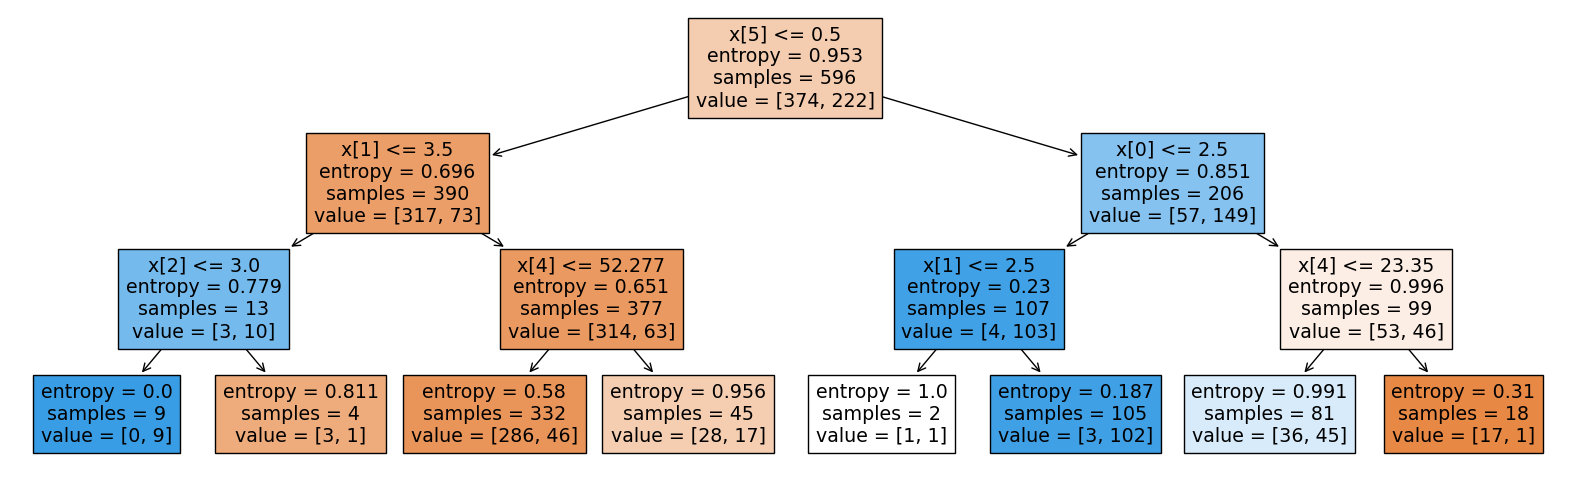

In [61]:
plt.figure(figsize=(20, 6))
plot_tree(clf, filled=True);

In [62]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [64]:
clf.score(X_train, y_train)

0.7818791946308725

In [65]:
clf.score(X_test, y_test)

0.7966101694915254

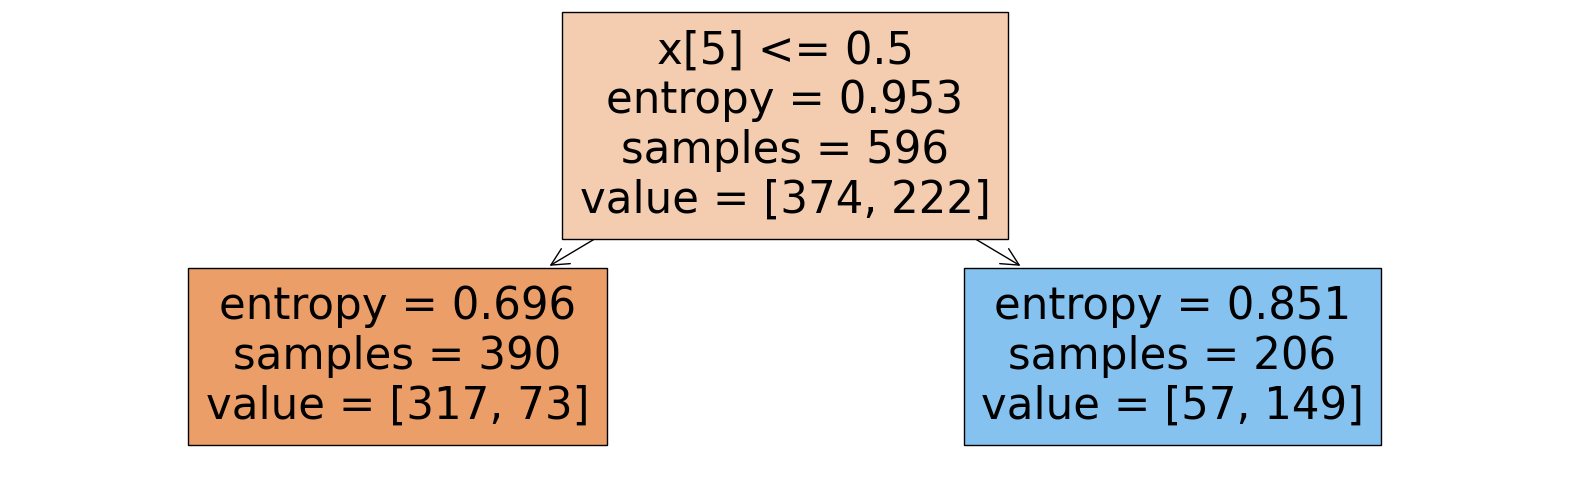

In [66]:
plt.figure(figsize=(20, 6))
plot_tree(clf, filled=True);